<a href="https://colab.research.google.com/github/kenleytaniar/Prediksi_Penghasilan/blob/main/Prediksi_Penghasilan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Kenley**
# **NIM : A11.2021.13795**
# **link colab : https://colab.research.google.com/drive/1NU3Xy0L_VaSjD1hD4iCLOuexIQe8Pmsr?usp=sharing**

## 1. Mengumpulkan data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import time

In [ ]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive # library untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') # mount Google Drive agar file di dalamnya dapat diakses.

# dir adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
dir = '/content/drive/My Drive/dataset_bengkod/adult.csv' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Nama kolom sesuai instruksi
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']

# Load dataset
df_ori = pd.read_csv(dir, names=col_names, na_values='?', skipinitialspace=True)
df = df_ori.copy()
# Menampilkan dataset

df.head() # Menampilkan data 5 baris pertama dataset untuk melihat struktur data.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. menelaah data

In [ ]:
df.info()  # Cek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()  # Cek statistik data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# 3. Validasi data

In [ ]:
df.isnull().sum()# Cek jumlah missing value per kolom

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


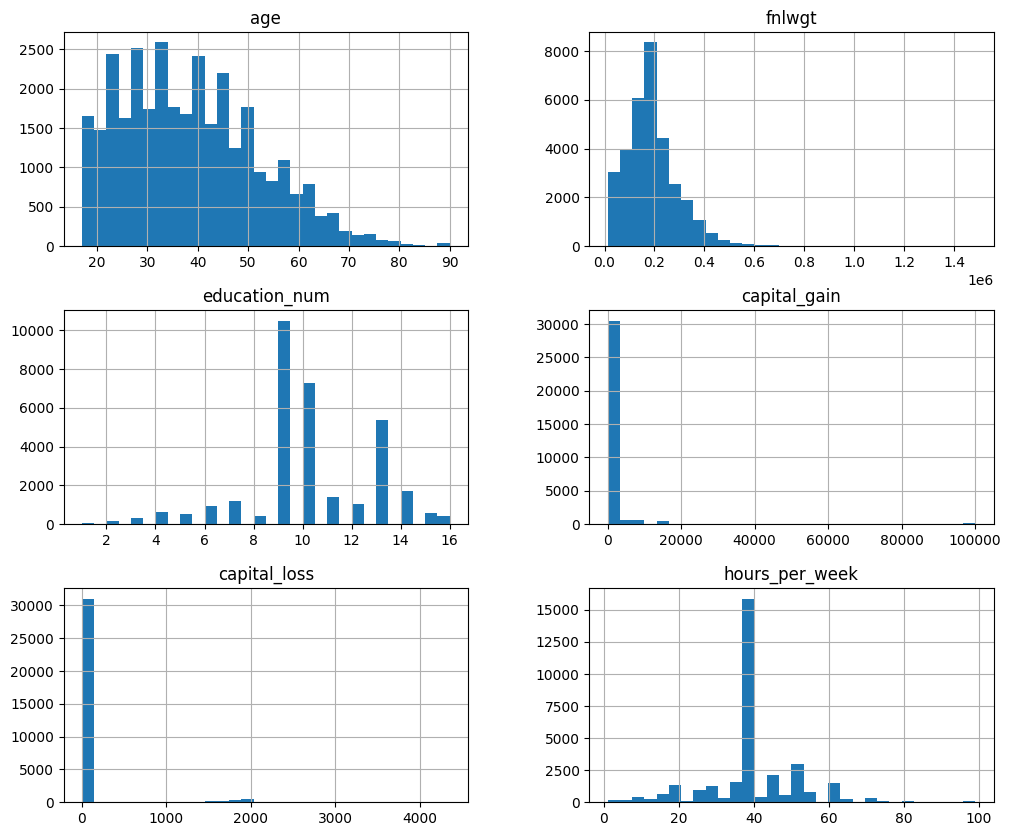

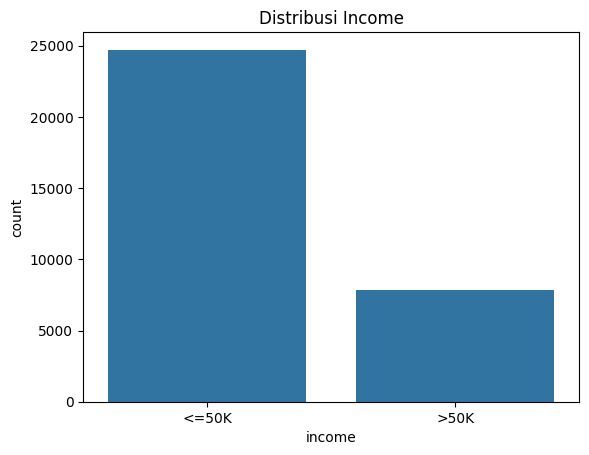

In [ ]:
# Distribusi data numerik
df.hist(figsize=(12, 10), bins=30)
plt.show()

# Distribusi income
sns.countplot(x='income', data=df)
plt.title("Distribusi Income")
plt.show()


# 4. menentukan objek data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 5. membersihkan data

In [ ]:
df_bersih=df.copy()

In [ ]:
df_bersih.dropna(inplace=True)  # Hapus baris dengan missing value

In [ ]:
df_bersih.isnull().sum()# Cek jumlah missing value per kolom

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


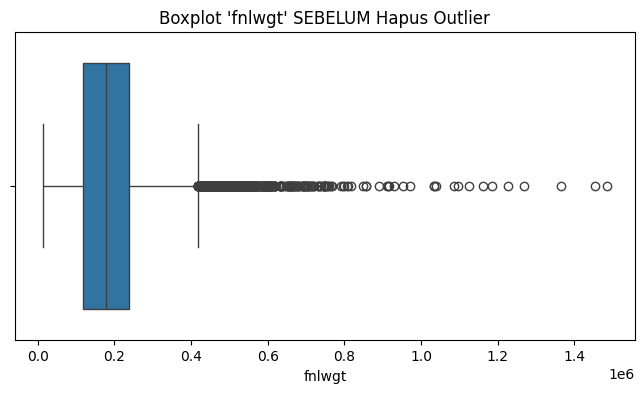

Jumlah data SEBELUM hapus outlier: (30162, 15)


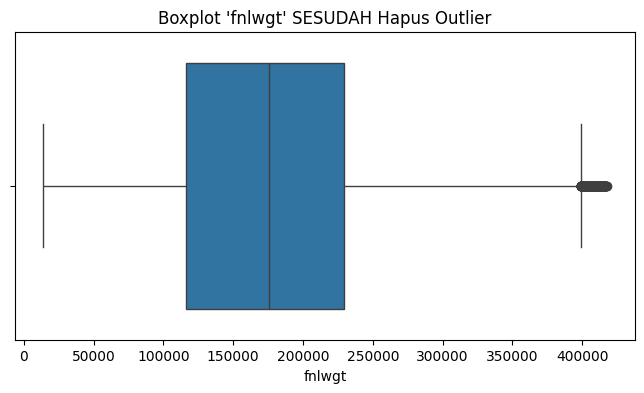

Jumlah data SESUDAH hapus outlier: (29259, 15)


In [ ]:

# --- Pilih hanya kolom 'fnlwgt' ---
numeric_cols = ['fnlwgt']  # hanya kolom ini yang akan dibersihkan dari outlier

# --- Fungsi untuk hapus outlier dengan IQR ---
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# --- Boxplot SEBELUM hapus outlier di fnlwgt ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_bersih['fnlwgt'])
plt.title("Boxplot 'fnlwgt' SEBELUM Hapus Outlier")
plt.show()

# --- Simpan jumlah data sebelum ---
print("Jumlah data SEBELUM hapus outlier:", df_bersih.shape)

# --- Hapus outlier hanya di kolom 'fnlwgt' ---
df_bersih = remove_outliers_iqr(df_bersih, numeric_cols)

# --- Boxplot SESUDAH hapus outlier di fnlwgt ---
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_bersih['fnlwgt'])
plt.title("Boxplot 'fnlwgt' SESUDAH Hapus Outlier")
plt.show()

# --- Tampilkan perbandingan jumlah data ---
print("Jumlah data SESUDAH hapus outlier:", df_bersih.shape)

In [ ]:
# --- Ambil kolom numerik dari df_bersih ---
numeric_cols = df_bersih.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'income' in numeric_cols:
    numeric_cols.remove('income')  # tidak ikut dinormalisasi

# --- Simpan data sebelum normalisasi untuk perbandingan ---
df_sebelum_norm = df_bersih[numeric_cols].copy()

# --- Lakukan normalisasi ---
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_bersih[numeric_cols])

# Simpan ke df baru
df_norm = df_bersih.copy()
df_norm[numeric_cols] = scaled_values  # overwrite fitur numerik dengan hasil normalisasi

# --- Bandingkan Statistik SEBELUM dan SESUDAH ---
print("\n📊 Statistik SEBELUM Normalisasi:")
print(df_sebelum_norm.describe().T[["mean", "std", "min", "max"]])

print("\n📊 Statistik SESUDAH Normalisasi:")
print(pd.DataFrame(scaled_values, columns=numeric_cols).describe().T[["mean", "std", "min", "max"]])


📊 Statistik SEBELUM Normalisasi:
                         mean           std      min       max
age                 38.543047     13.149958     17.0      90.0
fnlwgt          179771.879046  87574.614621  13769.0  417605.0
education_num       10.135309      2.539599      1.0      16.0
capital_gain      1091.712670   7395.001446      0.0   99999.0
capital_loss        89.242968    406.112950      0.0    4356.0
hours_per_week      40.951741     12.001037      1.0      99.0

📊 Statistik SESUDAH Normalisasi:
                        mean       std       min        max
age             1.214229e-16  1.000017 -1.638288   3.913156
fnlwgt          3.569834e-17  1.000017 -1.895592   2.715823
education_num   4.638356e-17  1.000017 -3.597208   2.309338
capital_gain   -1.991336e-17  1.000017 -0.147631  13.375113
capital_loss    2.064190e-17  1.000017 -0.219753  10.506510
hours_per_week  2.166185e-16  1.000017 -3.329081   4.837020


# 6.merekonstruksi data

In [ ]:
encoder = LabelEncoder()
for col in df_norm.select_dtypes(include=['object']).columns:
    df_norm[col] = encoder.fit_transform(df_norm[col])

In [ ]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29259 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             29259 non-null  float64
 1   workclass       29259 non-null  int64  
 2   fnlwgt          29259 non-null  float64
 3   education       29259 non-null  int64  
 4   education_num   29259 non-null  float64
 5   marital_status  29259 non-null  int64  
 6   occupation      29259 non-null  int64  
 7   relationship    29259 non-null  int64  
 8   race            29259 non-null  int64  
 9   sex             29259 non-null  int64  
 10  capital_gain    29259 non-null  float64
 11  capital_loss    29259 non-null  float64
 12  hours_per_week  29259 non-null  float64
 13  native_country  29259 non-null  int64  
 14  income          29259 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.6 MB


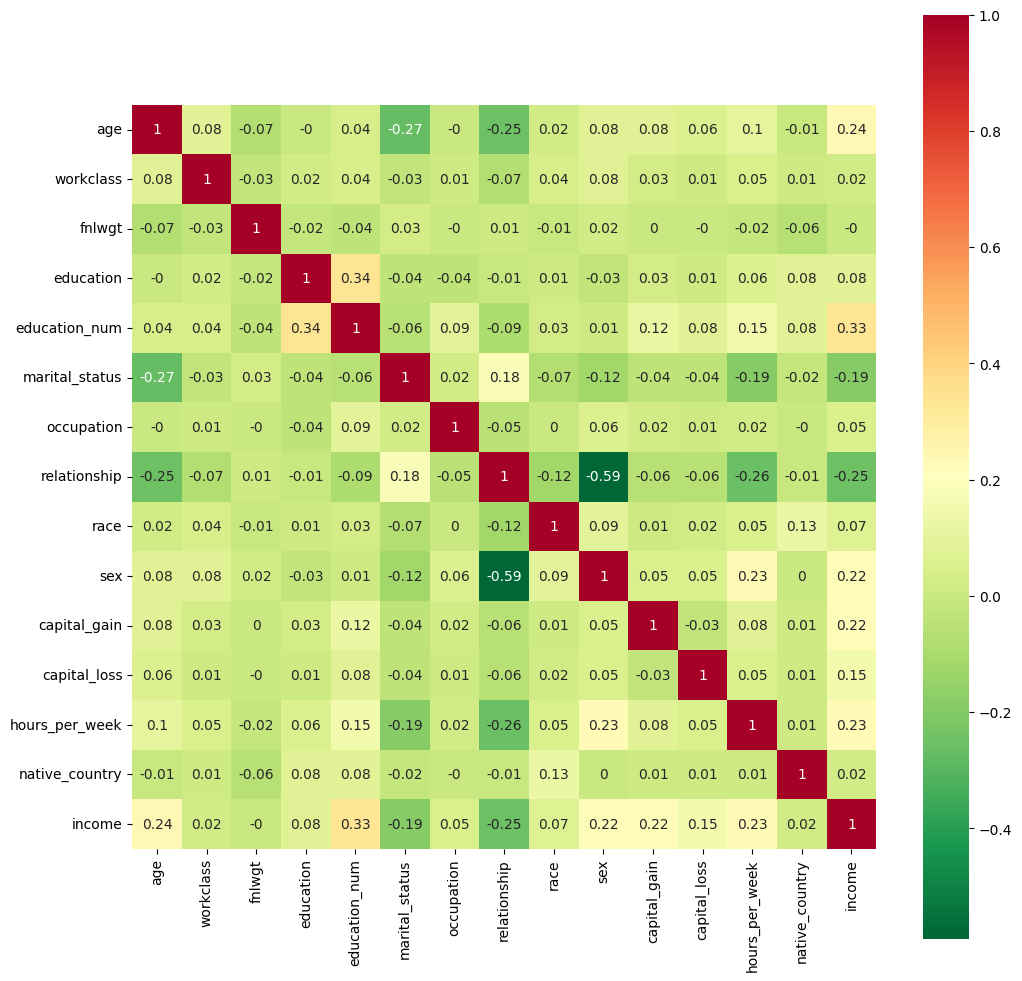

In [ ]:
# Menampilkan Korelasi antar Fitur
correlation = df_norm.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# 7. Menentukan label data

In [ ]:
from imblearn.over_sampling import SMOTE
# Pisahkan fitur dan target
X = df_norm.drop(columns=['income'])
y = df_norm['income']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# 8. Membangun model

In [ ]:
accuracy_scores = {}


In [ ]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)

accuracy_scores["Random Forest"] = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8546
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4423
           1       0.73      0.64      0.68      1429

    accuracy                           0.85      5852
   macro avg       0.81      0.78      0.79      5852
weighted avg       0.85      0.85      0.85      5852



In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
accuracy_scores["Logistic Regression"] = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4423
           1       0.70      0.46      0.55      1429

    accuracy                           0.82      5852
   macro avg       0.77      0.70      0.72      5852
weighted avg       0.81      0.82      0.81      5852



In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
accuracy_scores["Decision Tree"] = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4423
           1       0.71      0.67      0.69      1429

    accuracy                           0.85      5852
   macro avg       0.80      0.79      0.79      5852
weighted avg       0.85      0.85      0.85      5852



In [ ]:

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
accuracy_scores["SVM"] = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2947
           1       0.00      0.00      0.00       745

    accuracy                           0.80      3692
   macro avg       0.40      0.50      0.44      3692
weighted avg       0.64      0.80      0.71      3692



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi XGBoost
acc_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_scores["XGBoost"] = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.2f}")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2947
           1       0.62      0.53      0.57       745

    accuracy                           0.84      3692
   macro avg       0.75      0.72      0.74      3692
weighted avg       0.83      0.84      0.84      3692




🔹 Hasil Akurasi Model:
                 Model  Accuracy
4              XGBoost  0.840466
2        Decision Tree  0.834778
0        Random Forest  0.831257
1  Logistic Regression  0.826111
3                  SVM  0.798212


<ipython-input-52-ee942296dccd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_df["Model"], y=accuracy_df["Accuracy"], palette="viridis")


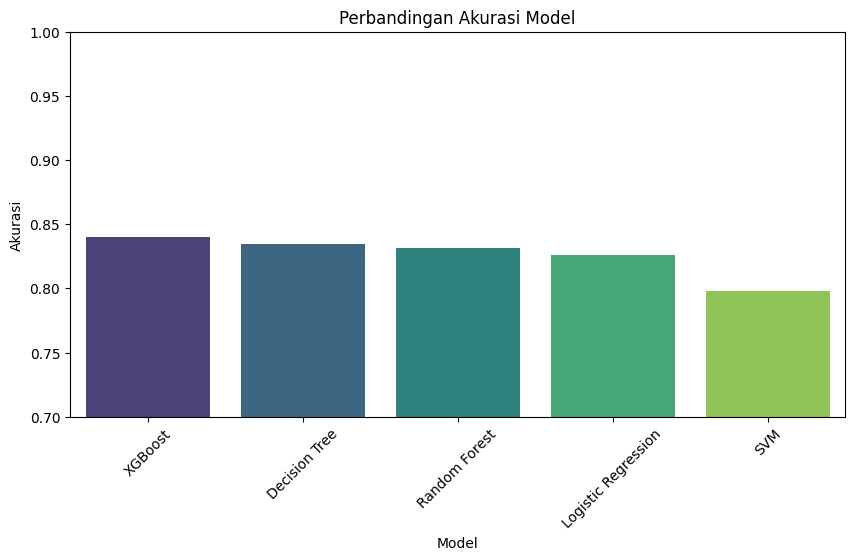

In [ ]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

print("\n🔹 Hasil Akurasi Model:")
print(accuracy_df)

# 6. Visualisasi Akurasi Model
plt.figure(figsize=(10, 5))
sns.barplot(x=accuracy_df["Model"], y=accuracy_df["Accuracy"], palette="viridis")
plt.title("Perbandingan Akurasi Model")
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)  # Batas akurasi dari 70% hingga 100%
plt.show()


================= Random Forest =================
Training Time: 4.03 detik
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4423
           1       0.73      0.64      0.68      1429

    accuracy                           0.85      5852
   macro avg       0.81      0.78      0.79      5852
weighted avg       0.85      0.85      0.85      5852



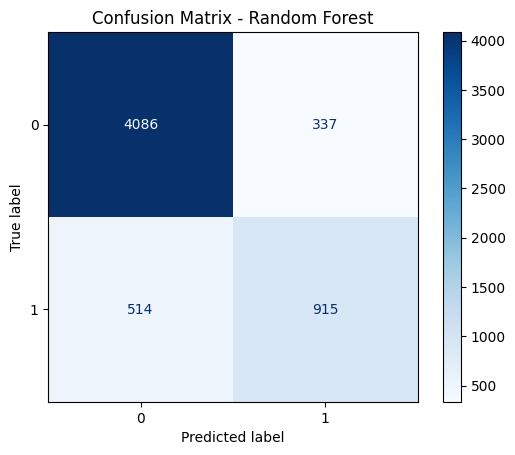


================= Decision Tree =================
Training Time: 0.23 detik
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4423
           1       0.61      0.62      0.61      1429

    accuracy                           0.81      5852
   macro avg       0.74      0.74      0.74      5852
weighted avg       0.81      0.81      0.81      5852



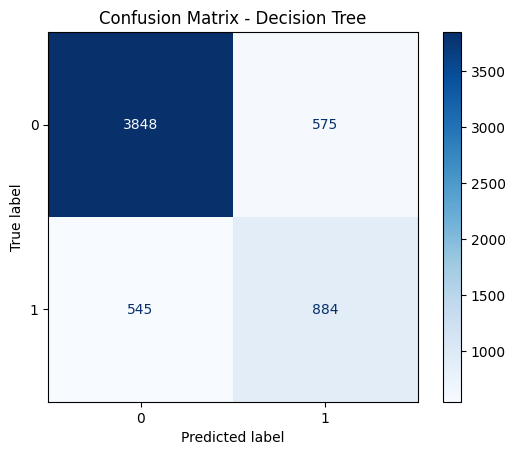


================= Logistic Regression =================
Training Time: 0.68 detik
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4423
           1       0.70      0.46      0.55      1429

    accuracy                           0.82      5852
   macro avg       0.77      0.70      0.72      5852
weighted avg       0.81      0.82      0.81      5852



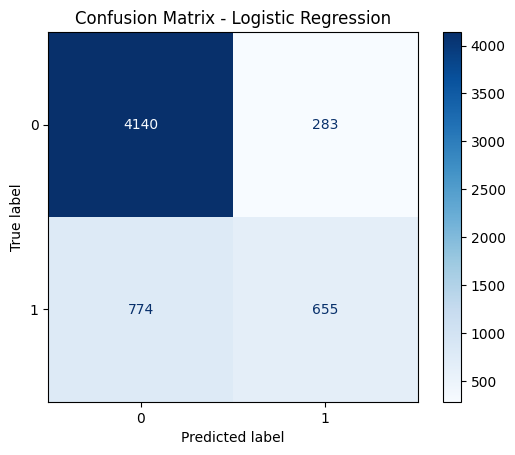


================= SVM =================
Training Time: 39.69 detik
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4423
           1       0.75      0.36      0.49      1429

    accuracy                           0.82      5852
   macro avg       0.79      0.66      0.69      5852
weighted avg       0.81      0.82      0.79      5852



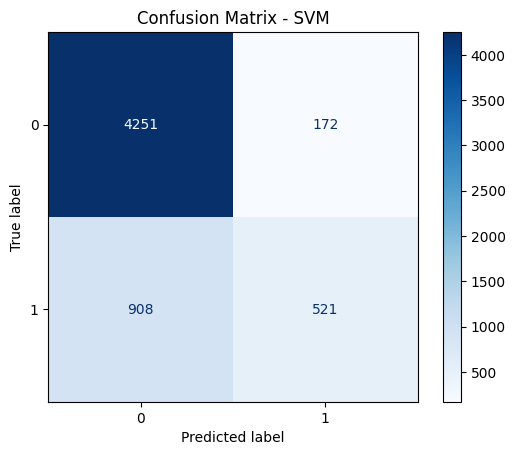


================= XGBoost =================


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:59:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time: 0.26 detik
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4423
           1       0.76      0.66      0.71      1429

    accuracy                           0.87      5852
   macro avg       0.83      0.80      0.81      5852
weighted avg       0.86      0.87      0.86      5852



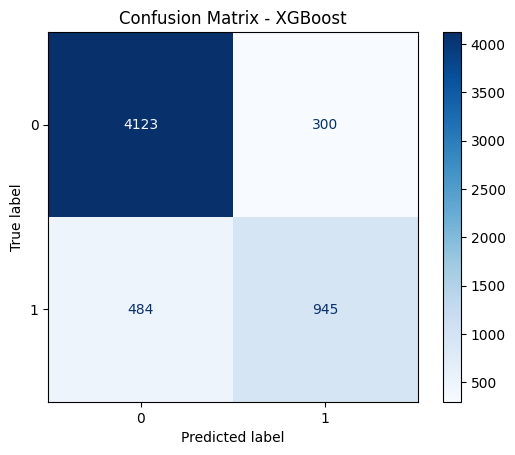


📊 Ringkasan Hasil Evaluasi Model:
                 Model  Accuracy  Precision    Recall  F1-score  \
4              XGBoost  0.866029   0.861756  0.866029  0.862784   
0        Random Forest  0.854580   0.849818  0.854580  0.851206   
2  Logistic Regression  0.819378   0.807279  0.819378  0.805393   
3                  SVM  0.815448   0.806368  0.815448  0.790530   
1        Decision Tree  0.808612   0.809997  0.808612  0.809281   

   Training Time (s)  
4           0.260896  
0           4.033475  
2           0.684273  
3          39.691801  
1           0.231623  


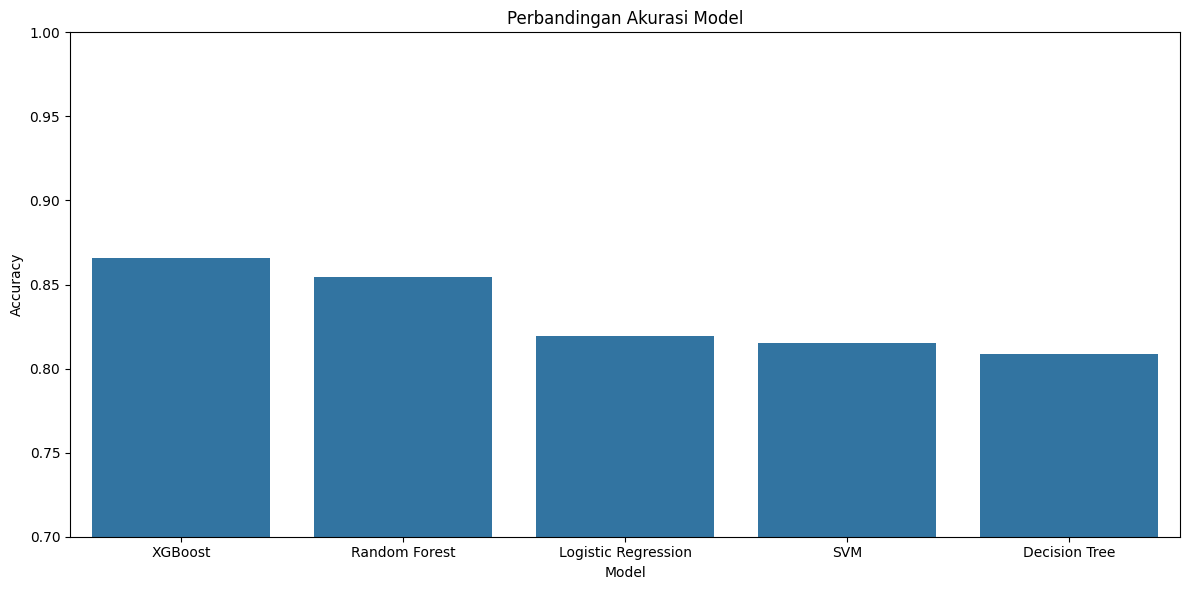

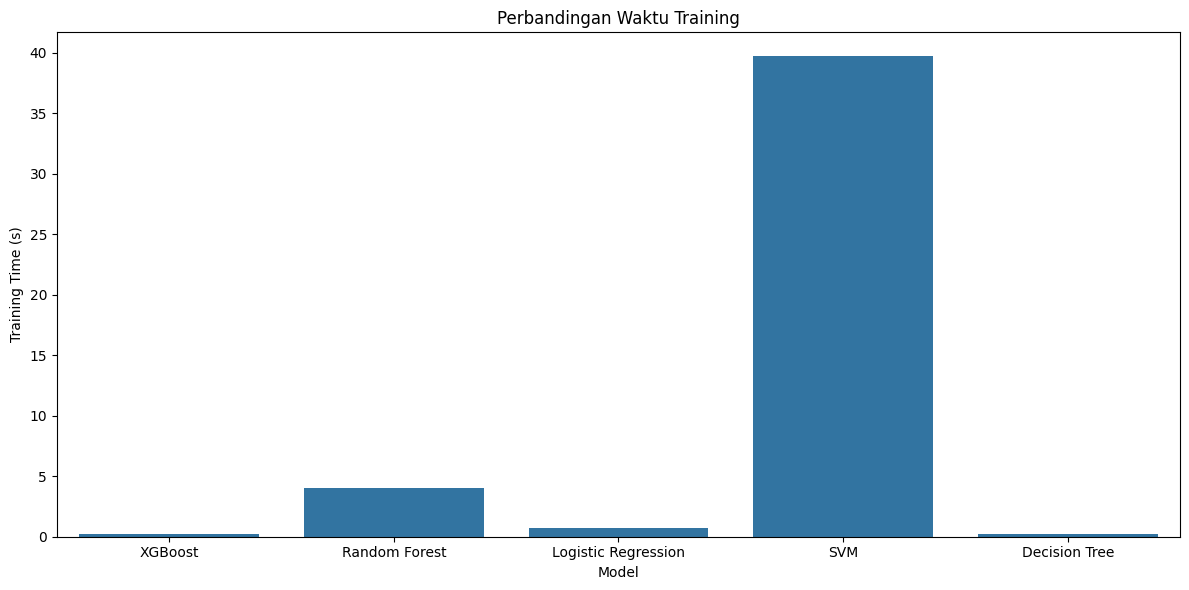

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import time
# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Simpan hasil evaluasi
results = []

# Training dan evaluasi semua model
for name, model in models.items():
    print(f"\n================= {name} =================")

    # Waktu mulai
    start_time = time.time()

    # Training
    model.fit(X_train, y_train)

    # Waktu selesai
    end_time = time.time()
    training_time = end_time - start_time

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"Training Time: {training_time:.2f} detik")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # Simpan hasil evaluasi ke list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "Training Time (s)": training_time
    })

# Tampilkan semua hasil evaluasi
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\n📊 Ringkasan Hasil Evaluasi Model:")
print(results_df)

# Visualisasi hasil perbandingan
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Perbandingan Akurasi Model")
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Training Time (s)", data=results_df)
plt.title("Perbandingan Waktu Training")
plt.tight_layout()
plt.show()

# 9. evaluasi

diskripsi singkat :
dari plot diatas dapat dilihat mana akurasi tertinggi dan terendah. waktu penyelesaian lama adalah svm. kesimpulan model terbaik dari model diatas jika dilihat dari waktu, akurasi, f-1 score, recall dan precision maka xgboostlah pemenangnya


dokumentasi tahapan preprocescing:
1. encoding label : memberikan label pada object untuk dikonversi ke angka
2. split data test : memisahkan data untuk train dan test
3. normalisasi fitur: stantarisasi fitur
4. smote : menyeimbangkan jumlah data pada target agar hasil akurasi lebih bagus
5. outlier : menghapus outlier pada data dengan metode IQR